In [172]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import seaborn as sns
%matplotlib inline

In [261]:
#Melihat gambaran data
df = pd.read_csv('Telco Customer Churn.csv')
df.head(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [3]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

Some observations we need to fix:
- Senior Citizen is not supposed to be numeric
- Total Charges is not counted as a numeric variable

In [4]:
#First Data Profiling
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Based on our observation and initial profiling, some stuff needs fixing:
    1. TotalCharges is a categorical variable, it should be numerical
    2. TotalCharges has some empty data
    3. SeniorCitizen should be boolean/categorical instead of numeric

In [263]:
#Memperbaiki kolom TotalCharges
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')
df = df.replace(np.nan, 0, regex=True)
#Memperbaiki kolom SeniorCitizen
df['SeniorCitizen'].replace((1, 0), ('Yes', 'No'), inplace=True)

df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
NumberofServices      int64
dtype: object

In [11]:
df.head(5)

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [12]:
df.describe()

tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

In [20]:
#Final Data Profiling
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data is now relatively clean, next is EDA

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
#Outlier check pada 3 variable numerik (Tenure, MonthlyCharges, TotalCharges)
def detect_outlier(data):
    q1, q3 = np.percentile(sorted(data), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
    return outliers

print(detect_outlier(df['tenure']))
print(detect_outlier(df['MonthlyCharges']))
print(detect_outlier(df['TotalCharges']))

[]
[]
[]


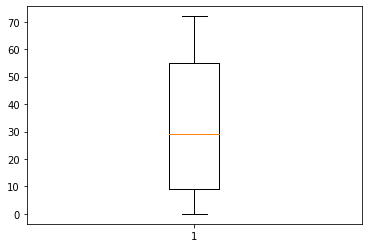

In [16]:
#Outlier by Boxplot
plt.boxplot(df['tenure'])
plt.show()

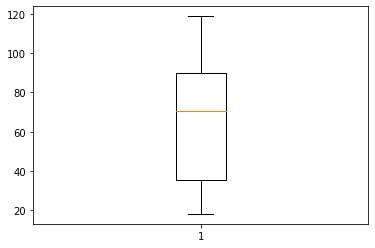

In [18]:
plt.boxplot(df['MonthlyCharges'])
plt.show()

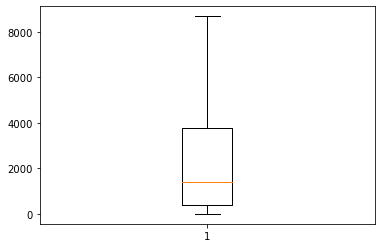

In [19]:
plt.boxplot(df['TotalCharges'])
plt.show()

Basic Data Information:
- There are 7043 rows of data with 21 columns
- The target variable is Churn and possible dropped column is customerID
- Data has 3 numerical variables in tenure, MonthlyCharges, and TotalCharges, while others are categorical/boolean
- No column has null/missing values
- The three numerical variables has no outliers

# Target Variable

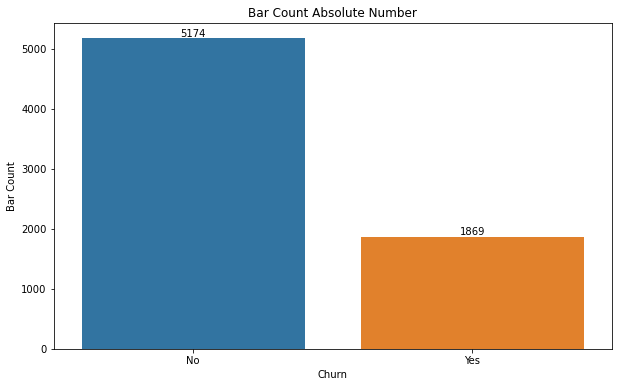

In [197]:
#Count
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Churn', data=df)
ax.set(ylabel='Bar Count', title='Bar Count Absolute Number')
ax.bar_label(ax.containers[0])
plt.show()

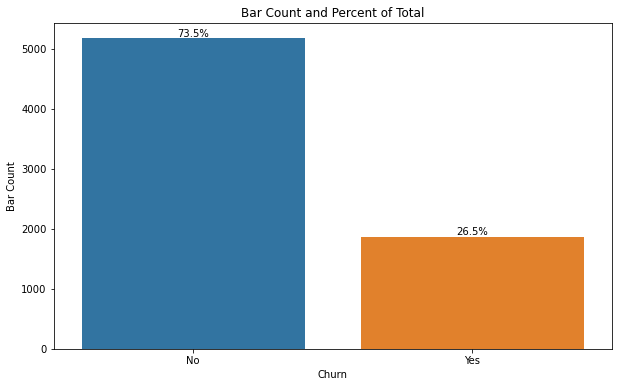

In [196]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Churn", data=df)
ax.set(ylabel='Bar Count', title='Bar Count and Percent of Total')

for c in ax.containers:
    labels = [f'{h/df.Churn.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

- Churn and non-Churn in this data is 26.5% (1869) vs 73.5% (5174), slightly unbalanced distribution

# Numerical Variables

<Figure size 720x432 with 0 Axes>

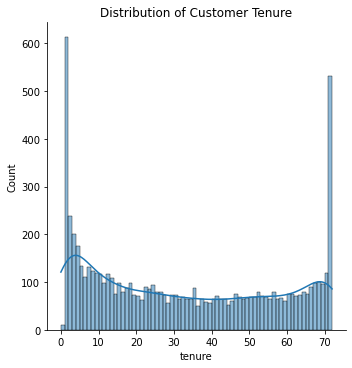

In [208]:
#Tenure
plt.figure(figsize=(10, 6))
ax = sns.displot(x='tenure', data=df, kde=True, binwidth=1)
ax.set(ylabel='Count', title='Distribution of Customer Tenure')
plt.show()

- Is not normally distributed
- Most common values are 1 (613 | 8.7%) and 72(362 | 5.1%)
- 11 customers has 0 tenure and they have 0 TotalCharges
- Why is there a lot of 72? Probably has something to do with customers who stayed with the company from the very start
- The tenure varies in distribution likely because of different contracts available to customers, from Month-to-Month to Two Years

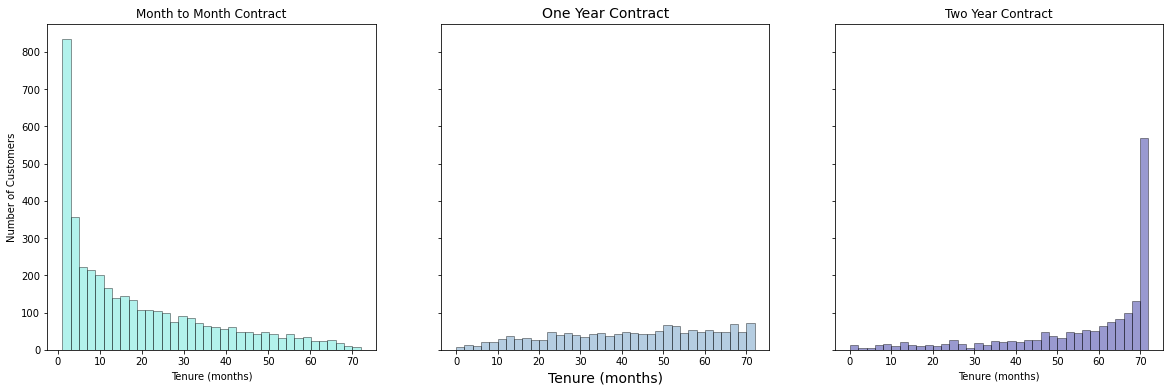

In [209]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')
plt.show()

- Most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay for a longer period of time.

[Text(0, 0.5, 'Density'),
 Text(0.5, 1.0, 'Distribution of Customer Tenure by Churn')]

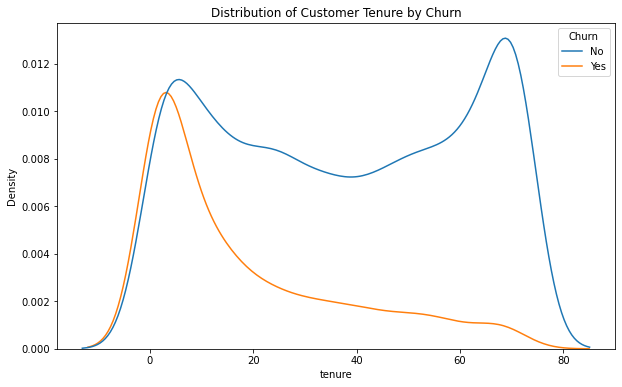

In [204]:
#Tenure and Churn
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(x='tenure', data=df, hue='Churn')
ax.set(ylabel='Density', title='Distribution of Customer Tenure by Churn')

[Text(0, 0.5, 'Tenure'),
 Text(0.5, 1.0, 'Distribution of Customer Tenure by Churn')]

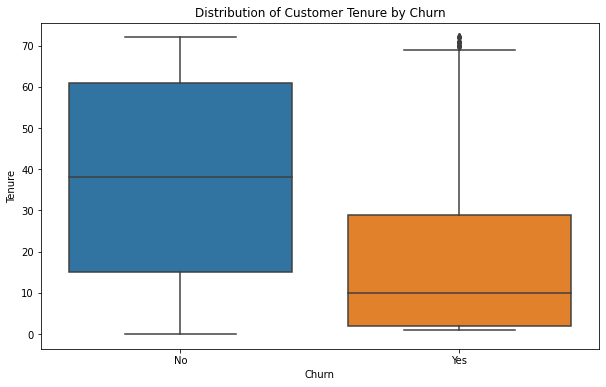

In [205]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Churn', y='tenure', data=df)
ax.set(ylabel='Tenure', title='Distribution of Customer Tenure by Churn')

- Churn customers have lower tenure median of 10 months compared to non-churners with median of 38 months.
- Newer clients seem more likely to Churn
- This variable may be an important feature

<Figure size 720x432 with 0 Axes>

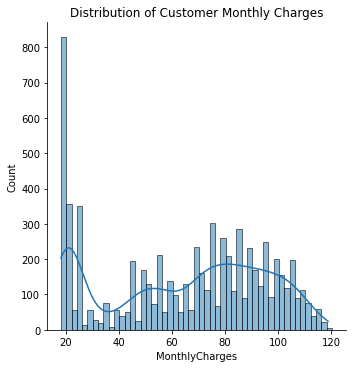

In [211]:
#MonthlyCharges
plt.figure(figsize=(10, 6))
ax = sns.displot(x='MonthlyCharges', data=df, kde=True, binwidth=2)
ax.set(ylabel='Count', title='Distribution of Customer Monthly Charges')
plt.show()

- Is not normally distributed
- Highest peak and most common value is around 20
- 11 customers without tenure still has MonthlyCharges values, personally i think they should be dropped so it doesn't disrupt the model as in this variable

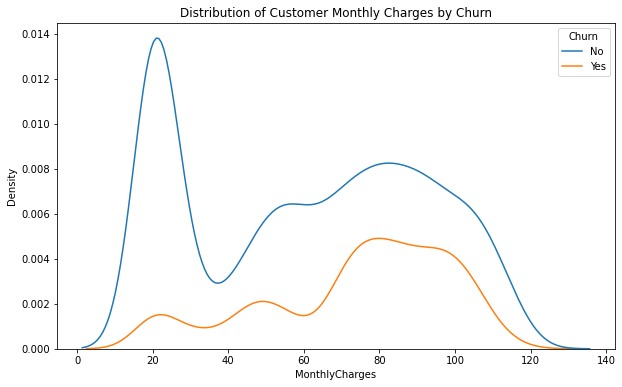

In [214]:
#MonthlyCharges and Churn
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(x='MonthlyCharges', data=df, hue='Churn')
ax.set(ylabel='Density', title='Distribution of Customer Monthly Charges by Churn')
plt.show()

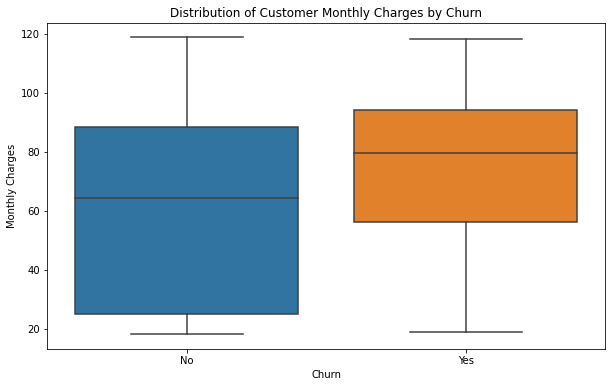

In [215]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
ax.set(ylabel='Monthly Charges', title='Distribution of Customer Monthly Charges by Churn')
plt.show()

- Does not follow the normal distribution
- Highest peak and most common value is around 20
- The distribution peaked on 20-30 USD, decreases, and then increase and started to stabilize around 40-110USD before decreasing as it reached 120USD
- Median of Monthly Charges is 70.35USD while the mean is 64.7USD
- This variable may be an important feature

<Figure size 720x432 with 0 Axes>

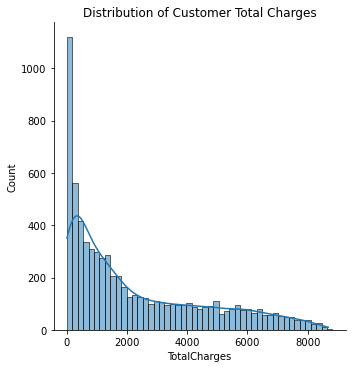

In [217]:
#TotalCharges
plt.figure(figsize=(10, 6))
ax = sns.displot(x='TotalCharges', data=df, kde=True, binwidth=180)
ax.set(ylabel='Count', title='Distribution of Customer Total Charges')
plt.show()

- Is not normally distributed
- Distribution peaked on 0-500 dollars and then generally decreases from there

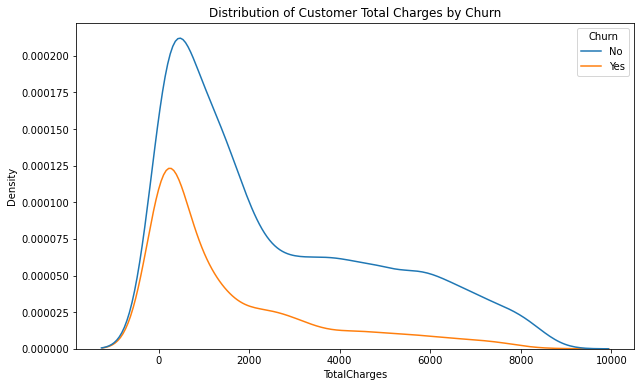

In [218]:
#TotalCharges and Churn
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(x='TotalCharges', data=df, hue='Churn')
ax.set(ylabel='Density', title='Distribution of Customer Total Charges by Churn')
plt.show()

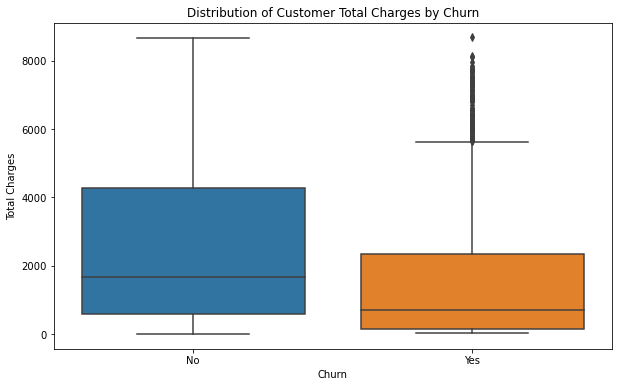

In [222]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Churn', y='TotalCharges', data=df)
ax.set(ylabel='Total Charges', title='Distribution of Customer Total Charges by Churn')
plt.show()

- Churn customers has lower TotalCharges median compared to non-churn
- It seems that there is higer churn when the total charges are lower, but
- This insight is not really intuitive, we had better patterns looking at tenure and MonthlyCharges individually compared to TotalCharges as a whole

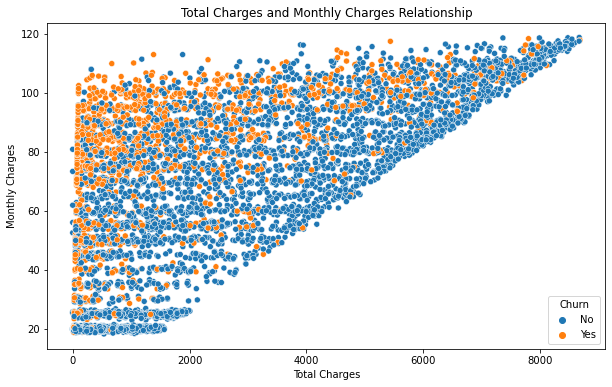

In [221]:
#Total Charges and Monthly Charges
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='TotalCharges', y='MonthlyCharges', data=df, hue= 'Churn')
ax.set(xlabel= 'Total Charges', ylabel='Monthly Charges', title='Total Charges and Monthly Charges Relationship')
plt.show()

- Total Charges and Monthly Charges has a clear line boundary which is likely affected by tenure 
- Churns seems more apparent on low Total Charges and High Monthly Charges which shows that low tenure customers are more likely to churn


# Categorical Variables

Categorical features of this dataset:
- 6 binary features (Yes/No, Male/Female)
- 9 features with three unique values each (categories)
- 1 feature with four unique values

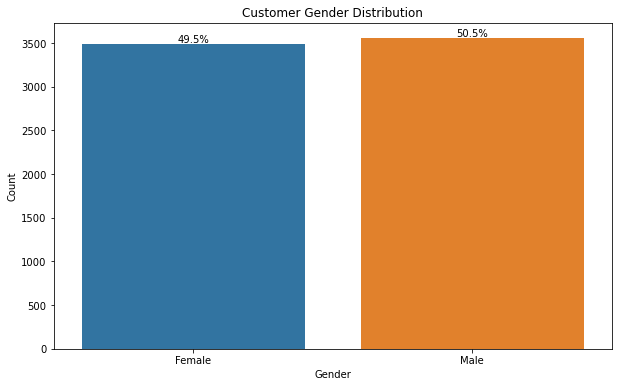

In [224]:
#Gender
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', data=df)
ax.set(xlabel= 'Gender', ylabel='Count', title='Customer Gender Distribution')

for c in ax.containers:
    labels = [f'{h/df.gender.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

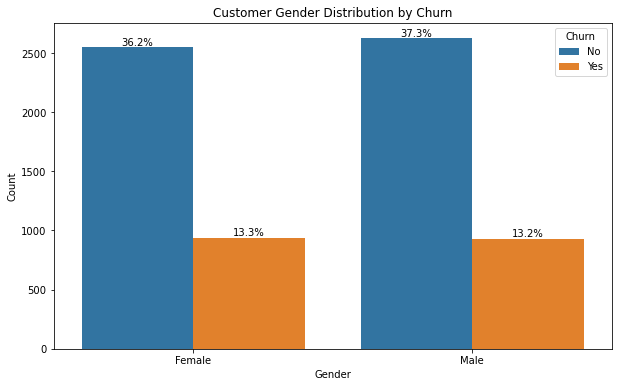

In [225]:
#Gender and Churn
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="gender", data=df, hue='Churn')
ax.set(xlabel= 'Gender', ylabel='Count', title='Customer Gender Distribution by Churn')

for c in ax.containers:
    labels = [f'{h/df.gender.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

- Male and Female in this dataset is balanced, 3555(50.5%) and 3488(49.5%)
- Churn distribution among gender is also relatively balanced, thus gender is not indicative of churn

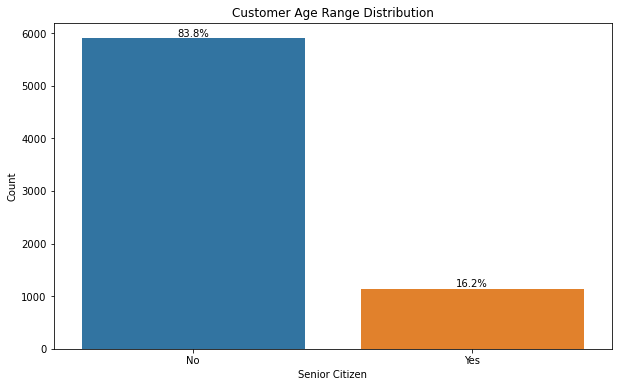

In [226]:
#SeniorCitizen
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='SeniorCitizen', data=df)
ax.set(xlabel= 'Senior Citizen', ylabel='Count', title='Customer Age Range Distribution')

for c in ax.containers:
    labels = [f'{h/df.SeniorCitizen.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

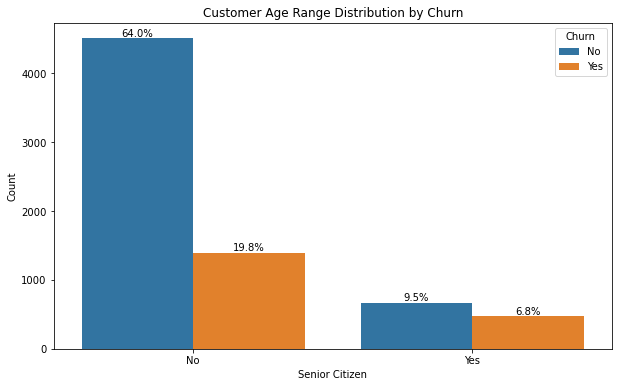

In [230]:
#SeniorCitizen and Churn
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="SeniorCitizen", data=df, hue='Churn')
ax.set(xlabel= 'Senior Citizen', ylabel='Count', title='Customer Age Range Distribution by Churn')

for c in ax.containers:
    labels = [f'{h/7043*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

- 1142 (16.2%)  of customers of the customers are senior citizens
- Senior Citizen are actually more likely to churn than non-senior customers


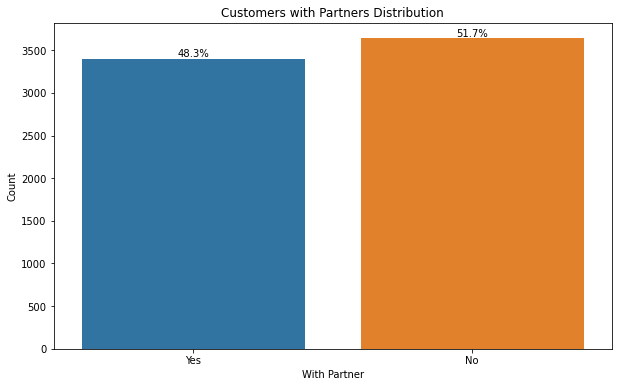

In [231]:
#Partner
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Partner', data=df)
ax.set(xlabel= 'With Partner', ylabel='Count', title='Customers with Partners Distribution')

for c in ax.containers:
    labels = [f'{h/df.Partner.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

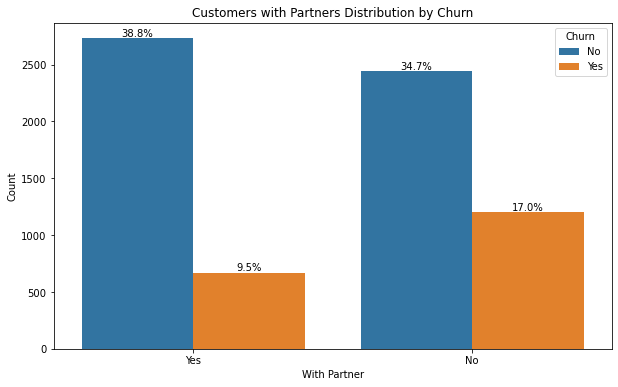

In [232]:
#Partner and Churn
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Partner", data=df, hue='Churn')
ax.set(xlabel= 'With Partner', ylabel='Count', title='Customers with Partners Distribution by Churn')

for c in ax.containers:
    labels = [f'{h/df.Partner.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

- Customers with partner and without, 3402(48.3%) and 3641(51.7%), relatively balanced
- Customers with no partner are more likely to churn

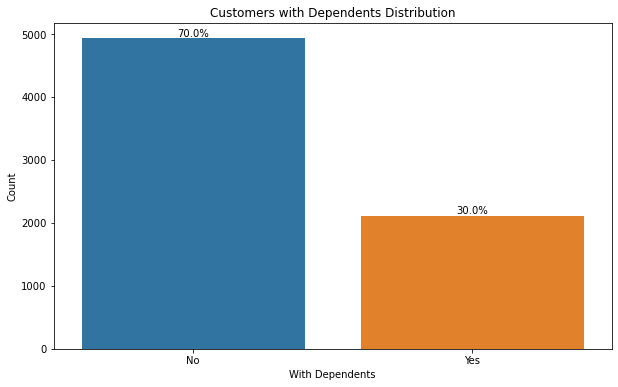

In [233]:
#Dependent
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Dependents', data=df)
ax.set(xlabel= 'With Dependents', ylabel='Count', title='Customers with Dependents Distribution')

for c in ax.containers:
    labels = [f'{h/df.Dependents.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

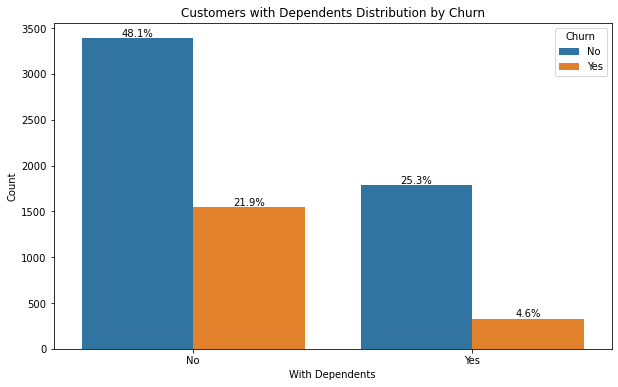

In [234]:
#Dependents and Churn
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Dependents", data=df, hue='Churn')
ax.set(xlabel= 'With Dependents', ylabel='Count', title='Customers with  Distribution by Churn')

for c in ax.containers:
    labels = [f'{h/df.Dependents.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

- 2110(30%) customers are with dependents, while 4933(70%) customers without, 70:30 slightly unbalanced distribution
- Customers with no dependents are relatively more likely to churn

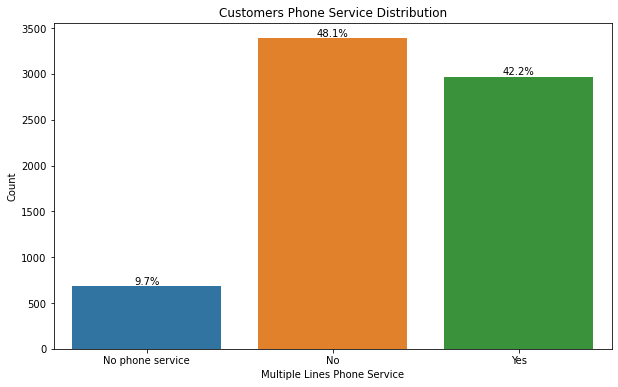

In [235]:
#PhoneService and MultipleLines
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="MultipleLines", data=df)
ax.set(xlabel= 'Multiple Lines Phone Service', ylabel='Count', title='Customers Phone Service Distribution')

for c in ax.containers:
    labels = [f'{h/df.MultipleLines.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

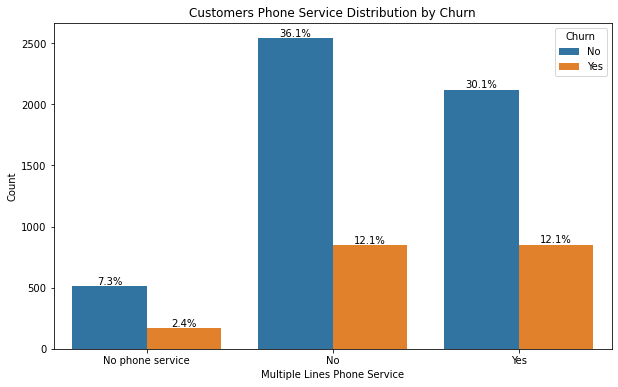

In [237]:
#PhoneService and Churn
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="MultipleLines", data=df, hue='Churn')
ax.set(xlabel= 'Multiple Lines Phone Service', ylabel='Count', title='Customers Phone Service Distribution by Churn')

for c in ax.containers:
    labels = [f'{h/df.MultipleLines.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

- Most customers (90.3%) use phone service, with more customer not using multiple lines (48.1%) than those who does (42.2%)
- Customers with multiple lines has slightly higher churn rate, but it doesn’t seem intuitive enough to be used as predictor for churn, we will check with the correlation matrix later


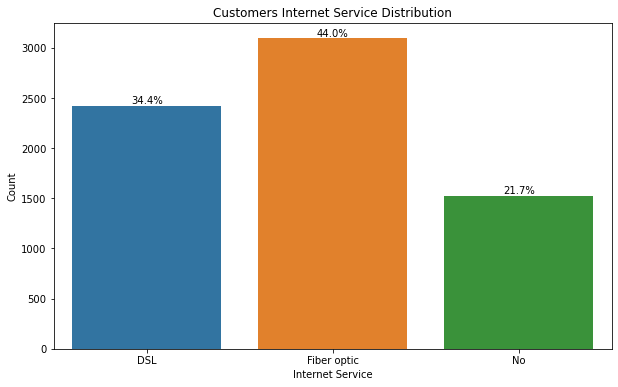

In [238]:
#InternetService
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="InternetService", data=df)
ax.set(xlabel= 'Internet Service', ylabel='Count', title='Customers Internet Service Distribution')

for c in ax.containers:
    labels = [f'{h/df.InternetService.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

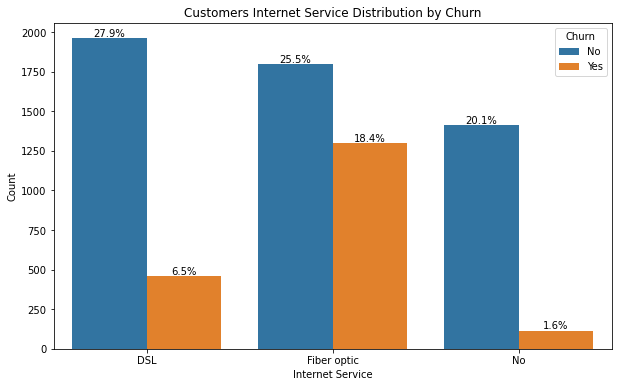

In [239]:
#InternetService and Churn
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="InternetService", data=df, hue='Churn')
ax.set(xlabel= 'Internet Service', ylabel='Count', title='Customers Internet Service Distribution by Churn')

for c in ax.containers:
    labels = [f'{h/df.InternetService.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

- Most customers (78.3%) use internet service, with more customer using Fiber Optic (43.9%) than DSL (34.4%)
- Customers with no internet service are less likely to churn
- Customers with Fiber optic are more likely to churn than DSL customers

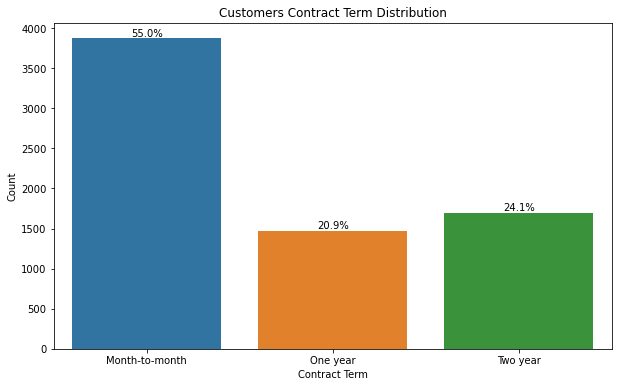

In [248]:
#Contract
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Contract", data=df)
ax.set(xlabel= 'Contract Term', ylabel='Count', title='Customers Contract Term Distribution')

for c in ax.containers:
    labels = [f'{h/df.Contract.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

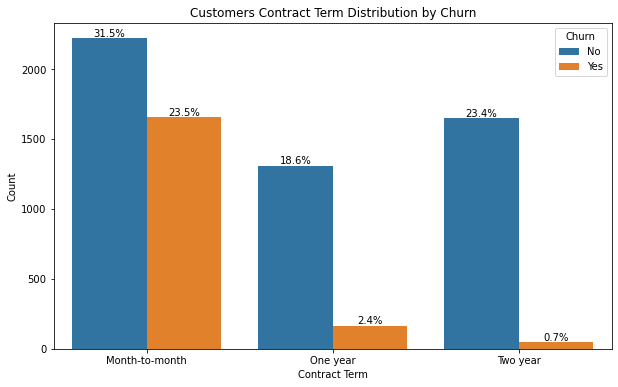

In [241]:
#Contract and Churn
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Contract", data=df, hue='Churn')
ax.set(xlabel= 'Contract Term', ylabel='Count', title='Customers Contract Term Distribution by Churn')

for c in ax.containers:
    labels = [f'{h/df.Contract.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

- 55% of customers signed Month-to-month contracts 
- Customers with month-to-month contracts are more likely to churn
- Customers with two year contracts are much unlikely to churn compared to other contracts 

<Figure size 720x432 with 0 Axes>

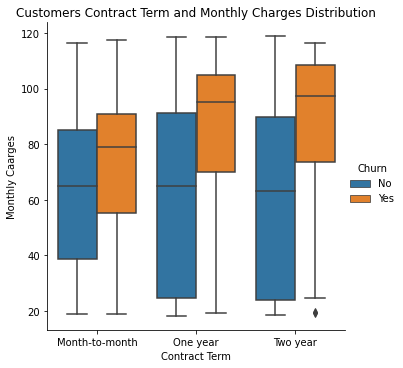

In [279]:
#MonthlyCharges, Contract and Churn
plt.figure(figsize=(10, 6))
ax = sns.catplot(y='MonthlyCharges', x="Contract", data=df, kind='box', hue='Churn')
ax.set(xlabel= 'Contract Term', ylabel='Monthly Caarges', title='Customers Contract Term and Monthly Charges Distribution')
plt.show()

- Longer contracts churns are more affected by higher monthly charges

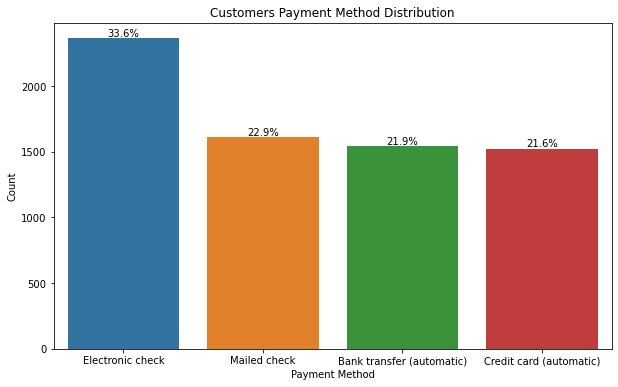

In [251]:
#Payment
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="PaymentMethod", data=df)
ax.set(xlabel= 'Payment Method', ylabel='Count', title='Customers Payment Method Distribution')

for c in ax.containers:
    labels = [f'{h/df.PaymentMethod.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

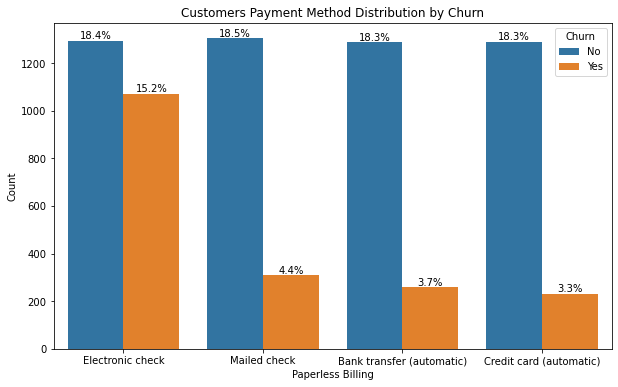

In [252]:
#Payment and Churn
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="PaymentMethod", data=df, hue='Churn')
ax.set(xlabel= 'Paperless Billing', ylabel='Count', title='Customers Payment Method Distribution by Churn')

for c in ax.containers:
    labels = [f'{h/df.PaymentMethod.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

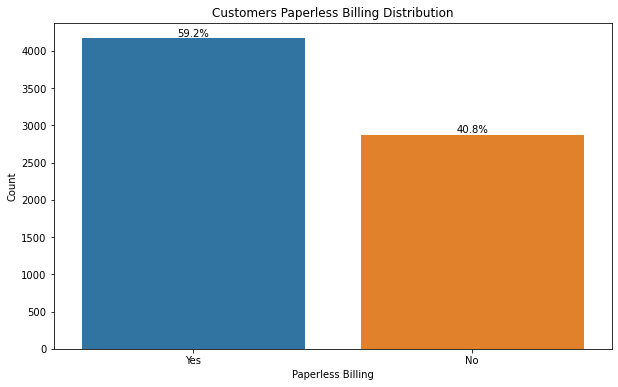

In [249]:
#Paperless Billing
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="PaperlessBilling", data=df)
ax.set(xlabel= 'Paperless Billing', ylabel='Count', title='Customers Paperless Billing Distribution')

for c in ax.containers:
    labels = [f'{h/df.PaperlessBilling.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

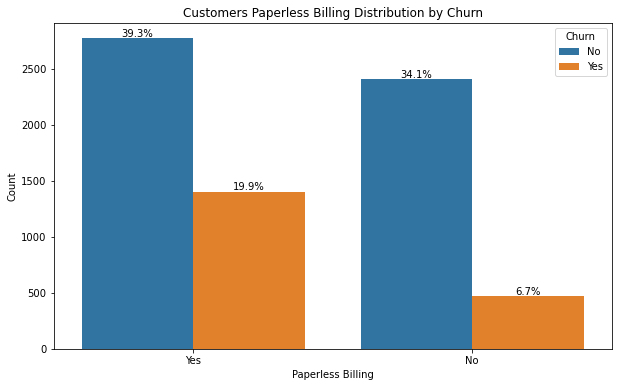

In [250]:
#Paperless Billing and Churn
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="PaperlessBilling", data=df, hue='Churn')
ax.set(xlabel= 'Paperless Billing', ylabel='Count', title='Customers Paperless Billing Distribution by Churn')

for c in ax.containers:
    labels = [f'{h/df.PaperlessBilling.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

- 59.2% of customers use paperless billing
- Customers with paperless billing are more likely to churn
- Around 34% of customers use Electronic check, this method also has much higher churn rate compared to other payment methods

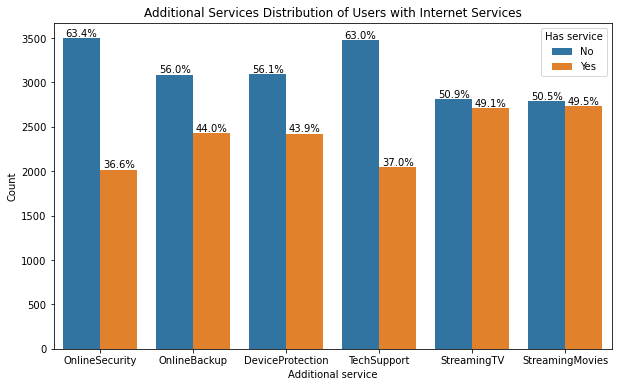

In [255]:
#Additional Services distribution of customers with Internet
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Count', title='Additional Services Distribution of Users with Internet Services')

for c in ax.containers:
    labels = [f'{h/5517*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

Above plots the distribution of additional services for customers who has internet service

In [262]:
#Number of Service
df['NumberofServices'] = (df[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport', 'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)

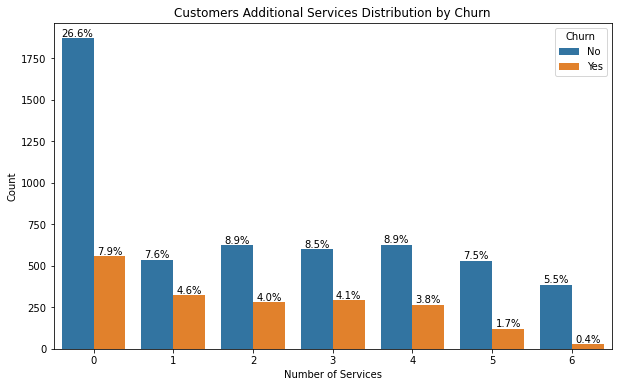

In [259]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="NumberofServices", data=df, hue='Churn')
ax.set(xlabel= 'Number of Services', ylabel='Count', title='Customers Additional Services Distribution by Churn')

for c in ax.containers:
    labels = [f'{h/df.NumberofServices.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

- High churn for customers that have 1 additional service.
- Customers with high number of additional services have a low churn rate.

# Correlation Heatmap

In [264]:
#Membuat Data Frame baru untuk ML
df_ml = df
#Melihat gambaran data numerik
df_ml.describe()

tenure  MonthlyCharges  TotalCharges  NumberofServices
count  7043.000000     7043.000000   7043.000000       7043.000000
mean     32.371149       64.761692   2279.734304          2.080931
std      24.559481       30.090047   2266.794470          1.975276
min       0.000000       18.250000      0.000000          0.000000
25%       9.000000       35.500000    398.550000          0.000000
50%      29.000000       70.350000   1394.550000          2.000000
75%      55.000000       89.850000   3786.600000          4.000000
max      72.000000      118.750000   8684.800000          6.000000

In [265]:
#Standarization variable numerik
df_ml['tenure.scaled'] = preprocessing.scale(df_ml['tenure'])
df_ml['MonthlyCharges.scaled'] = preprocessing.scale(df_ml['MonthlyCharges'])
df_ml['TotalCharges.scaled'] = preprocessing.scale(df_ml['TotalCharges'])
std = df_ml[['tenure.scaled','MonthlyCharges.scaled','TotalCharges.scaled']]

In [266]:
#LabelEncoding
#Memilih variable label encoding
le = df_ml.drop(['gender','customerID','tenure.scaled','MonthlyCharges.scaled','TotalCharges.scaled','PaymentMethod','Contract','InternetService','tenure','MonthlyCharges','TotalCharges'], axis = 1)
le.head(5)

#Menerapkan Label Encoding
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
le = le.apply(lambda x: object_to_int(x))
le.head()

#Memperbaiki ordinal encoding pada beberapa variable karena No internet Service dan No Phone Service = No (Level yang sama)
le[["MultipleLines",'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]= le[["MultipleLines",'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace({1:0, 2:1})
le.head()

SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
0              0        1           0             0              0   
1              0        0           0             1              0   
2              0        0           0             1              0   
3              0        0           0             0              0   
4              0        0           0             1              0   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               0             1                 0            0            0   
1               1             0                 1            0            0   
2               1             1                 0            0            0   
3               1             0                 1            1            0   
4               0             0                 0            0            0   

   StreamingMovies  PaperlessBilling  Churn  NumberofServices  
0                0                 1      0                 0  
1                0                 0      0                 2  
2                0                 1      1                 1  
3                0                 0      0                 3  
4                0                 1      1                 0

In [267]:
#OneHotEncoding
y = df_ml[['gender','PaymentMethod','Contract','InternetService']]
ohe = pd.get_dummies(y)
ohe.head(5)

gender_Female  gender_Male  PaymentMethod_Bank transfer (automatic)  \
0              1            0                                        0   
1              0            1                                        0   
2              0            1                                        0   
3              0            1                                        1   
4              1            0                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Contract_Month-to-month  Contract_One year  \
0                           0                        1                  0   
1                           1                        0                  1   
2                           1                        1                  0   
3                           0                        0                  1   
4                           0                        1                  0   

   Contract_Two year  InternetService_DSL  InternetService_Fiber optic  \
0                  0                    1                            0   
1                  0                    1                            0   
2                  0                    1                            0   
3                  0                    1                            0   
4                  0                    0                            1   

   InternetService_No  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

In [268]:
#Mengkombinasikan Label Encoding, OneHot Encoding, dan Standarization menjadi 1 data frame final
final =  pd.concat([ohe, le, std,], axis=1)
final.head(5)

gender_Female  gender_Male  PaymentMethod_Bank transfer (automatic)  \
0              1            0                                        0   
1              0            1                                        0   
2              0            1                                        0   
3              0            1                                        1   
4              1            0                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Contract_Month-to-month  Contract_One year  \
0                           0                        1                  0   
1                           1                        0                  1   
2                           1                        1                  0   
3                           0                        0                  1   
4                           0                        1                  0   

   Contract_Two year  InternetService_DSL  ...  DeviceProtection  TechSupport  \
0                  0                    1  ...                 0            0   
1                  0                    1  ...                 1            0   
2                  0                    1  ...                 0            0   
3                  0                    1  ...                 1            1   
4                  0                    0  ...                 0            0   

   StreamingTV  StreamingMovies  PaperlessBilling  Churn  NumberofServices  \
0            0                0                 1      0                 0   
1            0                0                 0      0                 2   
2            0                0                 1      1                 1   
3            0                0                 0      0                 3   
4            0                0                 1      1                 0   

   tenure.scaled  MonthlyCharges.scaled  TotalCharges.scaled  
0      -1.277445              -1.160323            -0.992611  
1       0.066327              -0.259629            -0.172165  
2      -1.236724              -0.362660            -0.958066  
3       0.514251              -0.746535            -0.193672  
4      -1.236724               0.197365            -0.938874  

[5 rows x 29 columns]

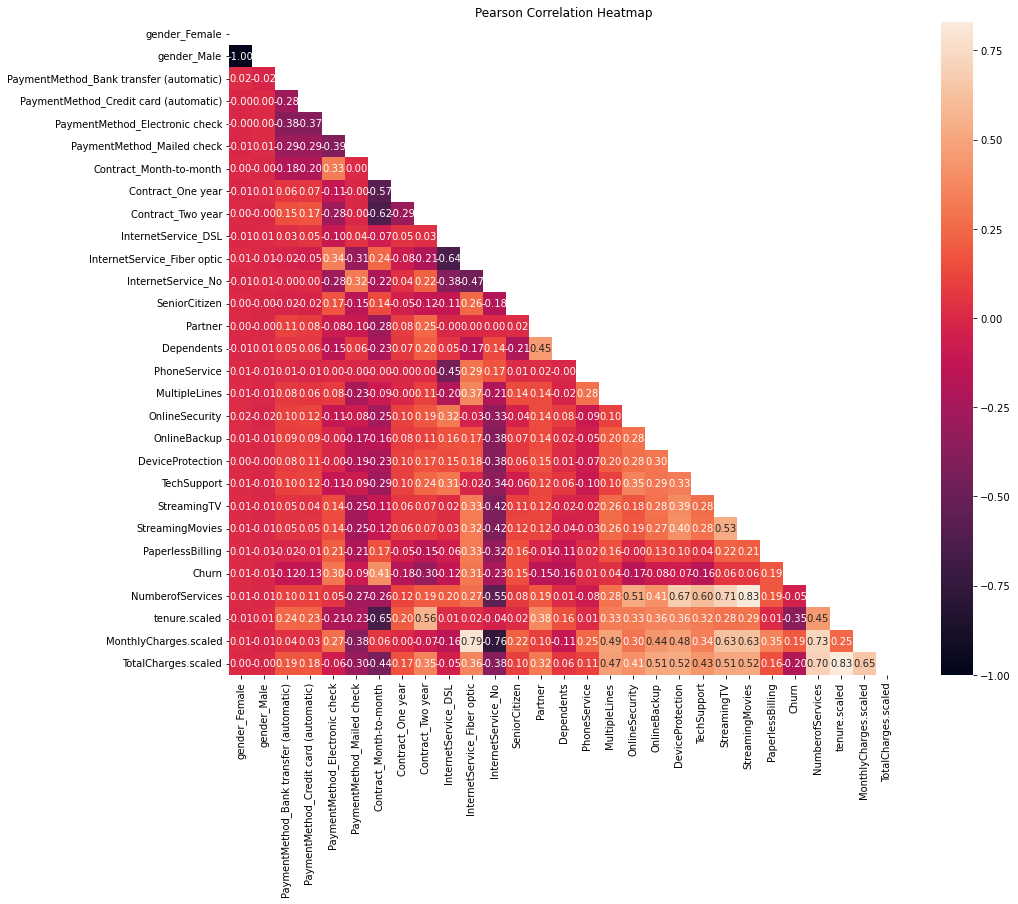

In [269]:
df_corr = final.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr,mask=mask, 
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

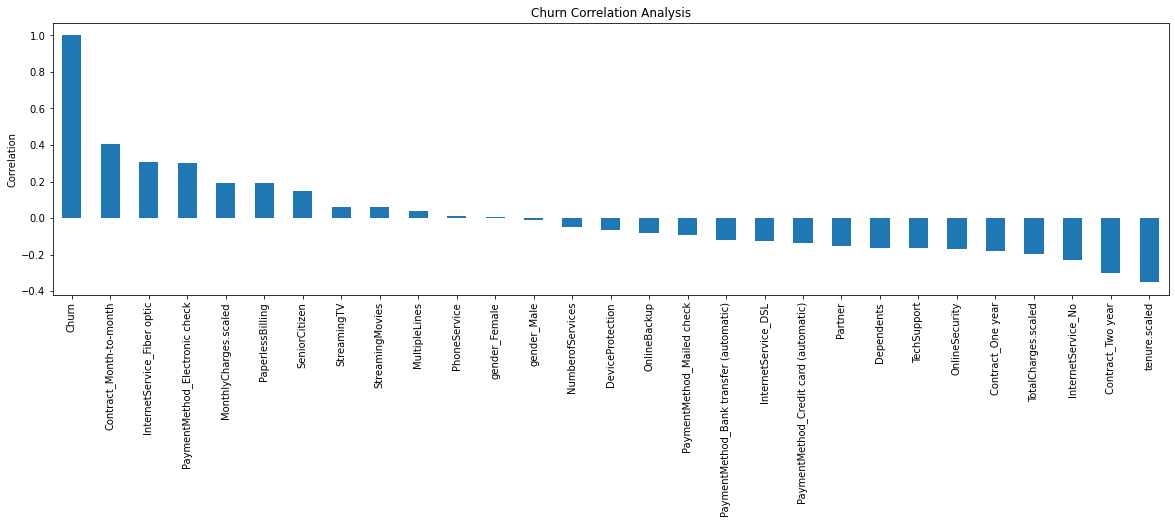

In [276]:
plt.figure(figsize=(30, 20))
ax = final.corr()['Churn'].sort_values(ascending=False).plot(kind='bar',figsize=(20,5))
ax.set(ylabel='Correlation', title='Churn Correlation Analysis')
plt.savefig('ChurnCorr.png')
plt.show()